# Preparing the data

In [54]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.grid_search import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
import tensorflow as tf
import math

In [2]:
data= pd.read_csv('C:\\Users\\Ashish2448311\\Desktop\\nyc-rolling-sales.csv',na_values='?') #read the csv file

In [3]:
data.shape #data has 84548 observations and 22 features

(84548, 22)

In [4]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
for i in data.columns:
    print(i)

Unnamed: 0
BOROUGH
NEIGHBORHOOD
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
BLOCK
LOT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
ZIP CODE
RESIDENTIAL UNITS
COMMERCIAL UNITS
TOTAL UNITS
LAND SQUARE FEET
GROSS SQUARE FEET
YEAR BUILT
TAX CLASS AT TIME OF SALE
BUILDING CLASS AT TIME OF SALE
SALE PRICE
SALE DATE


In [6]:
## Label encoding the categorical features. 
from sklearn.preprocessing import LabelEncoder
cols = [ 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE']

for x in cols:
    lbl = LabelEncoder()
    data[x] = lbl.fit_transform(data[x])

In [7]:
data=data.drop(['Unnamed: 0','EASE-MENT','ADDRESS','APARTMENT NUMBER','SALE DATE'],axis=1) #dropping these feautures

In [8]:
data.shape


(84548, 17)

In [9]:
data.convert_objects(convert_numeric=True).dtypes

C:\Users\Ashish2448311\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


BOROUGH                             int64
NEIGHBORHOOD                        int64
BUILDING CLASS CATEGORY             int64
TAX CLASS AT PRESENT                int64
BLOCK                               int64
LOT                                 int64
BUILDING CLASS AT PRESENT           int64
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE      int64
SALE PRICE                        float64
dtype: object

In [10]:
df_ = data.rename(columns={'BUILDING CLASS CATEGORY':'BCC', 'TAX CLASS AT PRESENT':'TCAP','BUILDING CLASS AT PRESENT' :'BCAP', 'ZIP CODE':'ZC',
                        'RESIDENTIAL UNITS':'RU','COMMERCIAL UNITS' :'CU', 'TOTAL UNITS':'TU', 'LAND SQUARE FEET':'LSF', 
                        'GROSS SQUARE FEET':'GSF','YEAR BUILT':'YEAR','TAX CLASS AT TIME OF SALE':'TX','BUILDING CLASS AT TIME OF SALE':'BC','SALE PRICE':'TARGET'})

# converting - into NAN

In [11]:
for i in df_.columns:
    df_[i]=pd.to_numeric(df_[i], errors='coerce')

In [12]:
df_.head()

,BOROUGH,NEIGHBORHOOD,BCC,TCAP,BLOCK,LOT,BCAP,ZC,RU,CU,TU,LSF,GSF,YEAR,TX,BC,TARGET
0,1,1,6,6,392,6,16,10009,5,0,5,1633.0,6440.0,1900,2,15,6625000.0
1,1,1,6,5,399,26,21,10009,28,3,31,4616.0,18690.0,1900,2,20,NaN
2,1,1,6,5,399,39,21,10009,16,1,17,2212.0,7803.0,1900,2,20,NaN
3,1,1,6,7,402,21,18,10009,10,0,10,2272.0,6794.0,1913,2,17,3936272.0
4,1,1,6,6,404,55,16,10009,6,0,6,2369.0,4615.0,1900,2,15,8000000.0


In [13]:
y=df_['TARGET']
DF=df_.drop(['TARGET'],axis=1)

In [14]:
df_.isnull().sum() # checking for nan values

BOROUGH             0
NEIGHBORHOOD        0
BCC                 0
TCAP                0
BLOCK               0
LOT                 0
BCAP                0
ZC                  0
RU                  0
CU                  0
TU                  0
LSF             26252
GSF             27612
YEAR                0
TX                  0
BC                  0
TARGET          14561
dtype: int64

# imputing missing values in features with its mean

In [15]:

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(DF) 
df= imputer.transform(DF)

In [16]:
df=pd.DataFrame(df)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,1.0,6.0,6.0,392.0,6.0,16.0,10009.0,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,15.0
1,1.0,1.0,6.0,5.0,399.0,26.0,21.0,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,20.0
2,1.0,1.0,6.0,5.0,399.0,39.0,21.0,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,20.0
3,1.0,1.0,6.0,7.0,402.0,21.0,18.0,10009.0,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,17.0
4,1.0,1.0,6.0,6.0,404.0,55.0,16.0,10009.0,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,15.0


In [18]:
df['target']=y

In [19]:
df=df.dropna()

In [20]:
df = df.rename(columns={0:'BOROUGH',1:'NEIGHBORHOOD',2:'BCC', 3:'TCAP',4:'BLOCK',5:'LOT',6 :'BCAP', 7:'ZC',
                        8:'RU',9:'CU', 10:'TU', 11:'LSF', 
                       12:'GSF',13:'YEAR',14:'TX',15:'BC','target':'target'})

In [21]:
df.head()

,BOROUGH,NEIGHBORHOOD,BCC,TCAP,BLOCK,LOT,BCAP,ZC,RU,CU,TU,LSF,GSF,YEAR,TX,BC,target
0,1.0,1.0,6.0,6.0,392.0,6.0,16.0,10009.0,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,15.0,6625000.0
3,1.0,1.0,6.0,7.0,402.0,21.0,18.0,10009.0,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,17.0,3936272.0
4,1.0,1.0,6.0,6.0,404.0,55.0,16.0,10009.0,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,15.0,8000000.0
6,1.0,1.0,6.0,7.0,406.0,32.0,18.0,10009.0,8.0,0.0,8.0,1750.0,4226.0,1920.0,2.0,17.0,3192840.0
9,1.0,1.0,7.0,5.0,387.0,153.0,34.0,10009.0,24.0,0.0,24.0,4489.0,18523.0,1920.0,2.0,33.0,16232000.0


# DATA EXPLORATION

In [22]:
df.describe()#Generates descriptive statistics

,BOROUGH,NEIGHBORHOOD,BCC,TCAP,BLOCK,LOT,BCAP,ZC,RU,CU,TU,LSF,GSF,YEAR,TX,BC,target
count,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,6.998700e+04,6.998700e+04,69987.000000,69987.000000,69987.000000,6.998700e+04
mean,2.921928,125.886879,7.190678,3.505365,4196.072528,373.828397,46.671239,10741.455185,1.899553,0.172489,2.092203,3.723936e+03,3.788460e+03,1799.348236,1.641976,46.858488,1.276456e+06
std,1.235688,75.689775,8.241204,2.674934,3429.196524,656.096528,50.319833,1263.234938,14.549545,9.123717,17.276100,3.369980e+04,2.447372e+04,520.884552,0.771162,50.652793,1.140526e+07
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00
25%,2.000000,63.000000,1.000000,1.000000,1348.000000,22.000000,10.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.268000e+03,1920.000000,1.000000,9.000000,2.250000e+05
50%,3.000000,122.000000,6.000000,5.000000,3378.000000,50.000000,20.000000,11209.000000,1.000000,0.000000,1.000000,2.946000e+03,2.400000e+03,1937.000000,2.000000,19.000000,5.300000e+05
75%,4.000000,195.000000,13.000000,5.000000,6186.000000,709.000000,119.000000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,2.000000,119.000000,9.500000e+05
max,5.000000,253.000000,46.000000,10.000000,16319.000000,9106.000000,166.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,165.000000,2.210000e+09


C:\Users\Ashish2448311\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

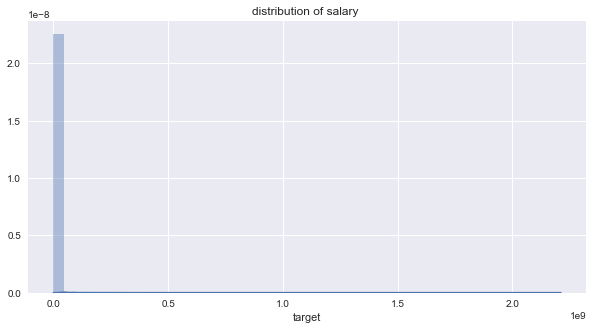

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5))
plt.title("distribution of salary ")
sns.distplot(df['target'])
plt.legend()
plt.show#

In [ ]:
# due to presence of high number of outliers the distribution has high standard deviation

# dropping values whose target are 0 

In [24]:
df_0 = df[df['target']==0]

In [25]:
df_0.shape

(10228, 17)

In [26]:
a=df_0.index.get_values()

In [27]:
df=df.drop(a)

In [28]:
df.shape

(59759, 17)

# dropping values whose sale price are less then 0.15e+07 and greater then 5000

In [29]:
df1 = df[(df['target'] <0.15e+07) & (df['target'] >5000)]

In [30]:
df1.shape

(48742, 17)

C:\Users\Ashish2448311\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

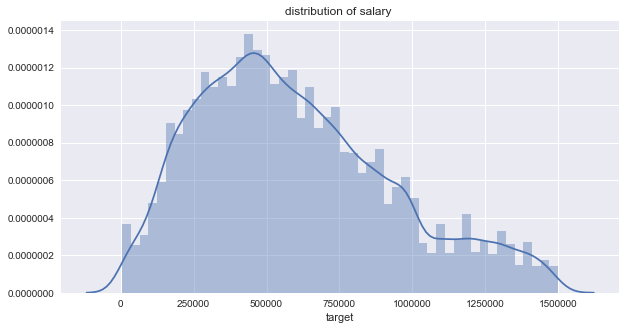

In [31]:
plt.figure(figsize=(10,5))
plt.title("distribution of salary ")
sns.distplot(df1['target'])
plt.legend()
plt.show#

In [ ]:
#now the distribution looks fine

In [32]:
Y = df1.target.values

In [33]:
X = df1.drop(['target'],axis=1)

# scaling the features

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['BOROUGH', 'NEIGHBORHOOD', 'BCC', 'TCAP', 'BLOCK', 'LOT', 'BCAP', 'ZC',
       'RU', 'CU', 'TU', 'LSF', 'GSF', 'YEAR', 'TX', 'BC']]=scaler.fit_transform(X[['BOROUGH', 'NEIGHBORHOOD', 'BCC', 'TCAP', 'BLOCK', 'LOT', 'BCAP', 'ZC',
       'RU', 'CU', 'TU', 'LSF', 'GSF', 'YEAR', 'TX', 'BC']])

In [35]:
X.head()

,BOROUGH,NEIGHBORHOOD,BCC,TCAP,BLOCK,LOT,BCAP,ZC,RU,CU,TU,LSF,GSF,YEAR,TX,BC
13,0.0,0.003953,0.173913,0.5,0.0228,0.004322,0.120482,0.855909,0.0,0.0,0.0,0.000932,0.001079,0.951909,0.333333,0.115152
15,0.0,0.003953,0.173913,0.5,0.0228,0.004322,0.120482,0.855909,0.0,0.0,0.0,0.000932,0.001079,0.951909,0.333333,0.115152
16,0.0,0.003953,0.173913,0.5,0.0228,0.004322,0.120482,0.855909,0.0,0.0,0.0,0.000932,0.001079,0.951909,0.333333,0.115152
17,0.0,0.003953,0.173913,0.5,0.0228,0.004987,0.120482,0.855909,0.0,0.0,0.0,0.000932,0.001079,0.954388,0.333333,0.115152
18,0.0,0.003953,0.173913,0.5,0.0228,0.005320,0.120482,0.855909,0.0,0.0,0.0,0.000932,0.001079,0.951909,0.333333,0.115152


# Feature Engineering Techniques

In [36]:
colnames = X.columns
x = X.as_matrix()

In [37]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

# 1) Stability Selection via Randomized Lasso


In [46]:
rlasso = linear_model.RandomizedLasso(alpha=0.01)
rlasso.fit(x, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

C:\Users\Ashish2448311\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


# 2) Recursive Feature Elimination ( RFE )

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = linear_model.LinearRegression(normalize=True)
lr.fit(x,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


# 3) Linear Model Feature Ranking

In [52]:
lr = LinearRegression(normalize=True)
lr.fit(x,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(x,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(x, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

C:\Users\Ashish2448311\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# 4) Random Forest feature ranking

In [55]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100, verbose=3)
rf.fit(x,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 2 of 100building tree 3 of 100building tree 1 of 100building tree 4 of 100




[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s


building tree 5 of 100
building tree 8 of 100building tree 6 of 100
building tree 7 of 100

building tree 9 of 100
building tree 11 of 100building tree 10 of 100
building tree 12 of 100

building tree 13 of 100
building tree 16 of 100building tree 14 of 100
building tree 15 of 100

building tree 17 of 100
building tree 20 of 100building tree 18 of 100
building tree 19 of 100

building tree 21 of 100
building tree 24 of 100building tree 22 of 100
building tree 23 of 100

building tree 25 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


building tree 27 of 100
building tree 26 of 100building tree 29 of 100
building tree 30 of 100

building tree 32 of 100
building tree 31 of 100building tree 33 of 100
building tree 34 of 100

building tree 36 of 100
building tree 35 of 100building tree 37 of 100
building tree 38 of 100


# Creating the Feature Ranking Matrix¶



In [56]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))


building tree 41 of 100
building tree 39 of 100building tree 40 of 100
building tree 42 of 100

building tree 46 of 100
building tree 43 of 100building tree 44 of 100
building tree 45 of 100

building tree 50 of 100
building tree 47 of 100building tree 48 of 100
building tree 49 of 100

building tree 54 of 100
building tree 51 of 100building tree 52 of 100
building tree 53 of 100

building tree 58 of 100
building tree 55 of 100building tree 56 of 100
building tree 57 of 100

building tree 61 of 100
building tree 59 of 100building tree 60 of 100
building tree 62 of 100

building tree 65 of 100
building tree 63 of 100building tree 64 of 100
building tree 66 of 100

building tree 69 of 100
building tree 67 of 100building tree 68 of 100
building tree 70 of 100

building tree 73 of 100
building tree 71 of 100building tree 72 of 100
building tree 74 of 100

building tree 76 of 100
building tree 75 of 100building tree 77 of 100
building tree 78 of 100

building tree 80 of 100
building tree 7

In [57]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Visualizing the mean ranking

C:\Users\Ashish2448311\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


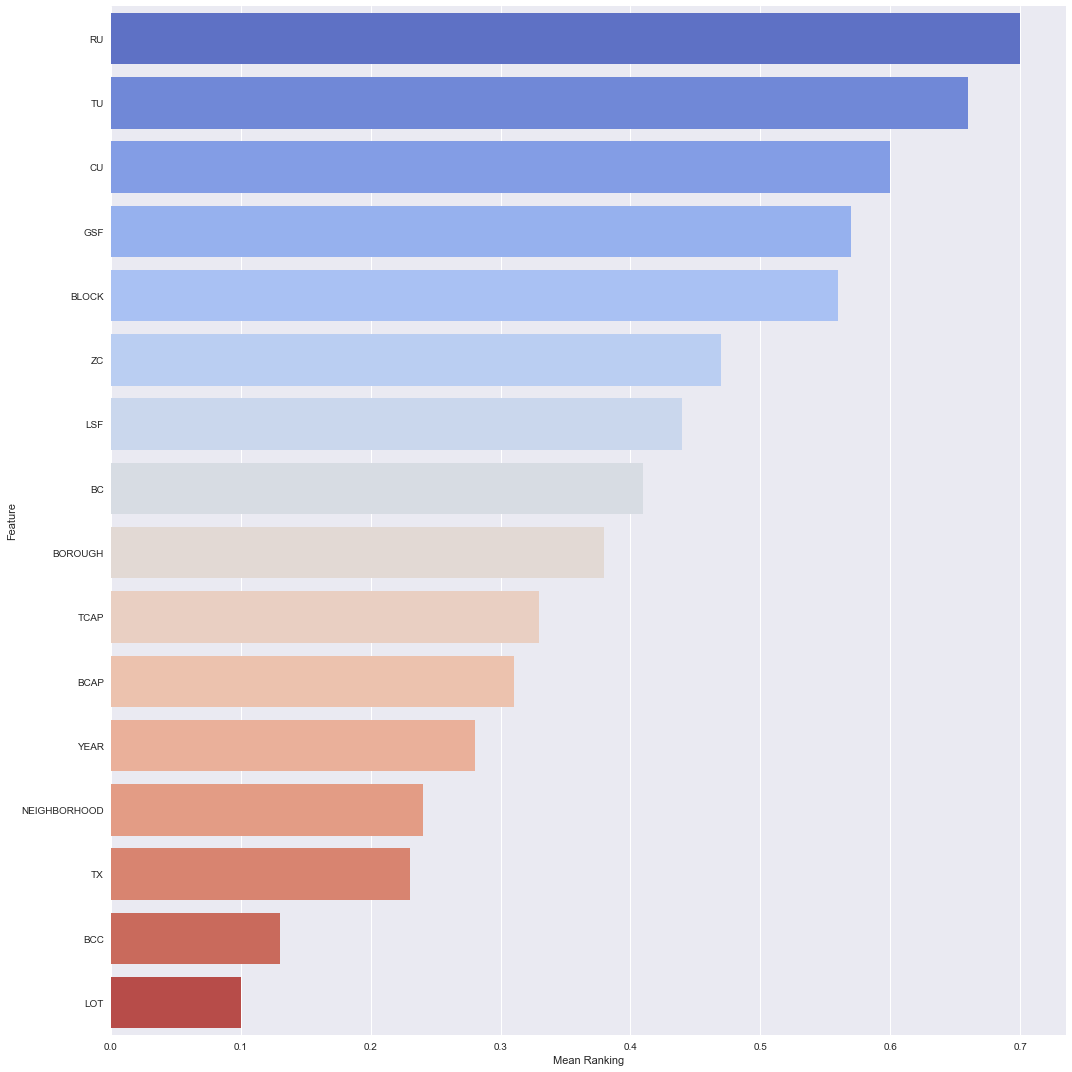

In [58]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=15, aspect=1, palette='coolwarm')

In [59]:
y=df1['target']
X = df1.drop(['target'],axis=1)

In [60]:
X.shape

(48742, 16)

# PCA to reduce the features

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y2 = scaler.fit_transform(X) #tranform into vecor
clf= PCA(.99)   
X_trans = clf.fit_transform(y2)
print('VARIANCE REATINED:',clf.n_components)
#rint(y2.shape)
print('SHAPE AFTER PCA:', X_trans.shape) #GIVES US THE SHAPE AFTER PCA

VARIANCE REATINED: 0.99
SHAPE AFTER PCA: (48742, 12)


# Statistical Modelling

# 1) LINEAR REGRESSION

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
kfold = KFold(n_splits=5, random_state=99)
results = cross_val_score(lm, X_trans, y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f MSE (%.2f) RMSE" % (-results.mean(), math.sqrt(-results.mean())))


Results: 215173935816.32 MSE (463868.45) RMSE


# 2) GRADIENT BOOSTING REGRESSOR

Parameter tuning using gridsearch

In [63]:
from sklearn import ensemble


param_test1 = {'n_estimators':np.arange(30,151,20)}
gsearch1 = GridSearchCV(estimator =ensemble.GradientBoostingRegressor(learning_rate=0.1), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_trans,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([ 30,  50,  70,  90, 110, 130, 150])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [64]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -99444510718.12411, std: 34540887011.13551, params: {'n_estimators': 30},
  mean: -97017298452.57123, std: 34987015114.56656, params: {'n_estimators': 50},
  mean: -96422723834.61327, std: 34784778295.29319, params: {'n_estimators': 70},
  mean: -96240581427.52341, std: 34088297205.04541, params: {'n_estimators': 90},
  mean: -95866266148.58932, std: 34586203317.01948, params: {'n_estimators': 110},
  mean: -95849755726.91025, std: 35107540658.27805, params: {'n_estimators': 130},
  mean: -96182854143.17860, std: 34690607367.47211, params: {'n_estimators': 150}],
 {'n_estimators': 130},
 -95849755726.91025)

In [65]:
param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(200,1001,200)}
gsearch2 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.1, n_estimators=90), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_trans,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -99644640760.76854, std: 35115317322.30930, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: -102484110611.81351, std: 37574724406.48640, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: -98185687566.33525, std: 33015673510.42662, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: -98003306097.75696, std: 33389676770.68901, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: -99815711977.96152, std: 39999173171.59463, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: -108827966881.00981, std: 48582817776.34645, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: -111638350127.52449, std: 59930676827.99511, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: -107311564769.88533, std: 51768347512.45438, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: -105343574295.02673, std: 44235151757.53831, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: -108530006232.54105, std: 42317598518.61184, param

In [66]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 130, max_depth = 5,min_samples_split=800,
          learning_rate = 0.1, verbose=3, random_state=77)

In [67]:

kfold = KFold(n_splits=5, random_state=99)
results = cross_val_score(clf, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f MSE (%.2f) RMSE" % (-results.mean(), math.sqrt(-results.mean())))

      Iter       Train Loss   Remaining Time 
         1 95654447691.0939            6.01s
         2 88979536521.6902           17.29s
         3 83495424290.1933           25.28s
         4 78997089631.5551           26.49s
         5 75305761695.6315           27.63s
         6 72087679739.9921           27.46s
         7 69422268463.5470           27.39s
         8 67185480590.2304           27.84s
         9 64365026246.1192           31.01s
        10 61966581938.5198           31.71s
        11 59930375093.7205           32.57s
        12 58682438142.3822           32.40s
        13 57283163020.1203           33.00s
        14 55900638200.4538           33.30s
        15 54723098636.6164           32.18s
        16 53680961574.2059           32.20s
        17 52772347492.3770           31.78s
        18 52075414715.1544           31.72s
        19 51313221721.3366           32.49s
        20 50630793087.6875           31.82s
        21 50087796083.7723           31.73s
        2

# 3) FULLY CONNECTED NEURAL NETWORKS

In [68]:
n = df1.shape[0]
p = df1.shape[1]
data = df1.values

In [69]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


In [70]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, -1]
X_test = data_test[:, 1:]
y_test = data_test[:, -1]

In [71]:
y_test.shape

(9748,)

In [72]:
# Import TensorFlow
import tensorflow as tf

# Define a and b as placeholders
a = tf.placeholder(dtype=tf.int8)
b = tf.placeholder(dtype=tf.int8)

# Define the addition
c = tf.add(a, b)

# Initialize the graph
graph = tf.Session()

# Run the graph
graph.run(c, feed_dict={a: 5, b: 4})

9

In [73]:
# Model architecture parameters
n_features = 16
n_neurons_1 = 256
n_neurons_2 = 128
n_neurons_3 = 64
n_neurons_4 = 36
n_target = 1

In [74]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_features])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [75]:
# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(tf.random_normal([n_features, n_neurons_1]),name="weights")
bias_hidden_1 = tf.Variable(tf.random_normal([n_neurons_1]),name="biases")
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(tf.random_normal([n_neurons_1, n_neurons_2]),name="weights")
bias_hidden_2 = tf.Variable(tf.random_normal([n_neurons_2]),name="biases")
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(tf.random_normal([n_neurons_2, n_neurons_3]),name="weights")
bias_hidden_3 = tf.Variable(tf.random_normal([n_neurons_3]),name="biases")
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(tf.random_normal([n_neurons_3, n_neurons_4]),name="weights")
bias_hidden_4 = tf.Variable(tf.random_normal([n_neurons_4]),name="biases")

# Output layer: Variables for output weights and biases
W_out = tf.Variable(tf.random_normal([n_neurons_4, n_target]),name="weights")
bias_out = tf.Variable(tf.random_normal([n_target]),name="biases")

In [76]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [77]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [78]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [ ]:
saver = tf.train.Saver(max_to_keep=10)

In [79]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())



# Number of epochs and batch size
epochs = 1000
batch_size = 256

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            
            

# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
saver.save(net, "checkpoint/sale_price.ckpt")
print(mse_final) 

160086780.0


In [80]:
import math

math.sqrt(mse_final)

12652.540614437876